# **Previsão de renda**

# Etapa 1 CRISP - DM: Entendimento do negócio

## A Importância de Modelos Preditivos no Mundo Financeiro

Modelos preditivos são ferramentas cruciais no setor financeiro, ajudando a prever comportamentos futuros, mitigar riscos e personalizar serviços. No caso deste projeto, o foco está em prever a **renda** de clientes, uma aplicação essencial para análise de crédito e estratégias de mercado.

---

## Objetivo

Desenvolver um modelo preditivo de **renda** para inclusão no portfólio, documentando o processo com o CRISP-DM. O foco será apresentar resultados claros e insights que demonstrem habilidades em ciência de dados e aprendizado de máquina.

---

# Etapa 2 Crisp-DM: Entendimento dos dados

### Sobre a Base de Dados

Trabalharemos com dados que incluem:  
- **Características pessoais:** Idade, sexo, estado civil.  
- **Aspectos financeiros:** Tipo de renda, posse de bens.  
- **Indicadores profissionais:** Tempo de emprego.  

A variável-alvo será **renda**, medida em reais.

---

### Dicionário de dados


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência de coleta das variáveis                                      | object|
| id_cliente              |  Código de identificação do cliente                                      | bool|
| sexo                    |  Sexo do Cliente                                     | object|
| posse_de_veiculo        |  Indica se o cliente possui veículo                                     | bool|
| posse_de_imovel         |  Indica se o cliente possui imóvel                                      | bool|
| qtd_filhos              |  Quantidade de filhos do cliente                                      | int64|
| tipo_renda              |  Tipo de renda do cliente                                      | object|
| educacao                |  Grau de instrução do cliente                                      | object|
| estado_civil            |  Estado civil do cliente                                      | object|
| tipo_residencia         |  Tipo de residência do cliente (própria, alugada etc)                                      | object|
| idade                   |  Idade do cliente                                      | int64|
| tempo_emprego           |  Tempo no emprego atual                                      | float64|
| qt_pessoas_residencia   |  Quantidade de pessoas que moram na residência                                      | float64|
| renda                   |  Renda em reais                                      | float64|



---

#### Carregando os pacotes
Carregar os pacotes que serão utilizados logo no início do programa é considerado uma boa prática.

In [1]:
import pandas as pd  # Para manipulação e análise de dados (DataFrames)
import numpy as np  # Para operações numéricas (arrays e álgebra linear)

import seaborn as sns  # Para visualização de dados (gráficos estilizados)
import matplotlib.pyplot as plt  # Para visualização de gráficos

import math  # Para funções matemáticas (como cálculo de raízes quadradas, etc.)

# Importação de ferramentas do scikit-learn para modelagem e avaliação
from sklearn.model_selection import train_test_split  # Para dividir os dados em treino e teste
from sklearn.metrics import mean_squared_error  # Para calcular o erro quadrático médio (MSE)

# Importação do statsmodels para análise estatística
import statsmodels.api as sm  # Para usar modelos estatísticos e realizar testes de hipóteses

# Configuração de estilo para os gráficos com Seaborn
sns.set(style="whitegrid")  # Estilo de gráfico com fundo branco e grade visível

# Garante que os gráficos gerados sejam exibidos diretamente no notebook
%matplotlib inline


#### Carregando os dados

In [2]:
renda = pd.read_csv('./input/previsao_de_renda.csv') # carregando meu excel (CSV) e armazenando na variavel 'renda'.

renda.head(1) # consultando dados do meu dataframe.

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


In [3]:
renda.info() # Verificando as colunas e seus respectivos tipos de dados.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

# Etapa 3 Crisp-DM: Preparação dos dados

#### A etapa 3 do CRISP-DM, "Preparação dos Dados", envolve selecionar, limpar, transformar e integrar os dados necessários para a modelagem.


- Nesta seção, após verificar que havia variáveis no meu dataset sem relevância para as análises, parti para a terceira etapa. Abaixo, realizo a remoção dessas variáveis, a verificação de dados duplicados e a remoção deles.
- A variável 'data_ref' já foi analisada no arquivo .py do Streamlit e não será utilizada nesta etapa, por não possuir relevância para o modelo de regressão que será criado

In [4]:
# Removendo colunas desnecessárias do DataFrame 'renda'

renda = renda.drop("Unnamed: 0", axis=1)  # Remove a coluna 'Unnamed: 0', que é um índice sem nome relevante
renda = renda.drop("data_ref", axis=1)  # Remove a coluna 'data_ref', que é uma data de referência da coleta dos dados, irrelevante para a análise
renda = renda.drop("id_cliente", axis=1)  # Remove a coluna 'id_cliente', que é um identificador único do cliente e não será usado para análise


In [5]:
# Verificando a quantidade de registros duplicados no DataFrame 'renda'

num_duplicados = renda.duplicated().sum()  # Verifica quais linhas são duplicadas e conta o número total de duplicatas
print(f"Número de dados duplicados: {num_duplicados}")  # Exibe o número de registros duplicados no DataFrame


Número de dados duplicados: 4553


**Obs:** Se eu tivesse feito a verificação de dados faltantes antes de remover colunas como 'id_cliente', o Python teria indicado que não há dados duplicados, já que o 'id_cliente' é uma variável incrementadora, sempre única. Isso destaca a importância de compreender os dados com os quais estamos trabalhando.

In [6]:
# Removendo registros duplicados do DataFrame 'renda'

renda = renda.drop_duplicates()  # Remove as linhas duplicadas do DataFrame 'renda'
renda.count()  # Conta o número de valores não nulos em cada coluna do DataFrame após a remoção das duplicatas


sexo                     10447
posse_de_veiculo         10447
posse_de_imovel          10447
qtd_filhos               10447
tipo_renda               10447
educacao                 10447
estado_civil             10447
tipo_residencia          10447
idade                    10447
tempo_emprego             8655
qt_pessoas_residencia    10447
renda                    10447
dtype: int64

 Após remover e limpar meus dados com as práticas da etapa 3 do CRISP, eles ficaram mais adequados para que eu pudesse retomar e realizar as análises. O CRISP-DM não é um método sequencial; muitas vezes, etapas são revisitadas. Frequentemente, analiso um dado, limpo, analiso de novo, faço a modelagem e volto à limpeza até que os dados estejam prontos para a análise. Abaixo, continuo a análise para entender melhor os dados e criar um modelo de regressão adequado.

### Variável tempo_emprego

A variável 'tempo_emprego' é a única que apresenta dados faltantes em nosso dataset. Nesta seção, irei avaliar sua relevância e decidir como tratar os dados ausentes.

In [7]:
# Exibindo estatísticas descritivas da coluna 'tempo_emprego' do DataFrame 'renda'

renda["tempo_emprego"].describe()  # Mostra estatísticas resumidas (como média, desvio padrão, mínimo, máximo, etc.) da coluna 'tempo_emprego'


count    8655.000000
mean        7.795977
std         6.740480
min         0.117808
25%         3.046575
50%         6.052055
75%        10.268493
max        42.906849
Name: tempo_emprego, dtype: float64

In [8]:
# Verificando a porcentagem de dados faltantes na coluna 'tempo_emprego' do DataFrame 'renda'

vazio = renda['tempo_emprego'].isnull().sum()  # Conta o número de valores nulos (faltantes) na coluna 'tempo_emprego'
total = len(renda)  # Obtém o número total de registros (linhas) no DataFrame 'renda'
porcentagem = vazio / total * 100  # Calcula a porcentagem de dados faltantes em relação ao total de registros

# Exibe a porcentagem de dados faltantes
print(f"A porcentagem de dados faltantes em relação ao montante é: {porcentagem:.2f}%")


A porcentagem de dados faltantes em relação ao montante é: 17.15%


Abaixo, decidi separar meu dataframe entre os dados com e sem 'tempo_emprego', com o objetivo de realizar análises gráficas para verificar se há diferenças no comportamento.

In [9]:
# Separando o DataFrame 'renda' em dois: um com registros sem dados faltantes na coluna 'tempo_emprego'
# e outro com registros onde a coluna 'tempo_emprego' está faltante

df_com_tempo_emprego = renda[renda['tempo_emprego'].notnull()]  # DataFrame com registros que possuem valor na coluna 'tempo_emprego'
df_sem_tempo_emprego = renda[renda['tempo_emprego'].isnull()]  # DataFrame com registros que têm valor nulo (faltante) na coluna 'tempo_emprego'

# Balanceando os DataFrames para que ambos tenham o mesmo número de registros

tamanho_menor = len(df_sem_tempo_emprego)  # Obtém o número de registros do DataFrame 'df_sem_tempo_emprego' (menor)

# Amostragem aleatória do DataFrame maior ('df_com_tempo_emprego') para balancear com o tamanho do DataFrame menor
df_com_tempo_emprego_balanceado = df_com_tempo_emprego.sample(n=tamanho_menor, random_state=42)  # Amostra de tamanho igual ao DataFrame menor

# Definindo as listas de variáveis para análise

# Variáveis contínuas (valores numéricos)
variaveis_continuas_sem_tempo_emprego = ['qtd_filhos', 'idade', 'qt_pessoas_residencia', 'renda']

# Variáveis categóricas (valores qualitativos, como sexo, tipo de residência)
variaveis_categoricas = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']


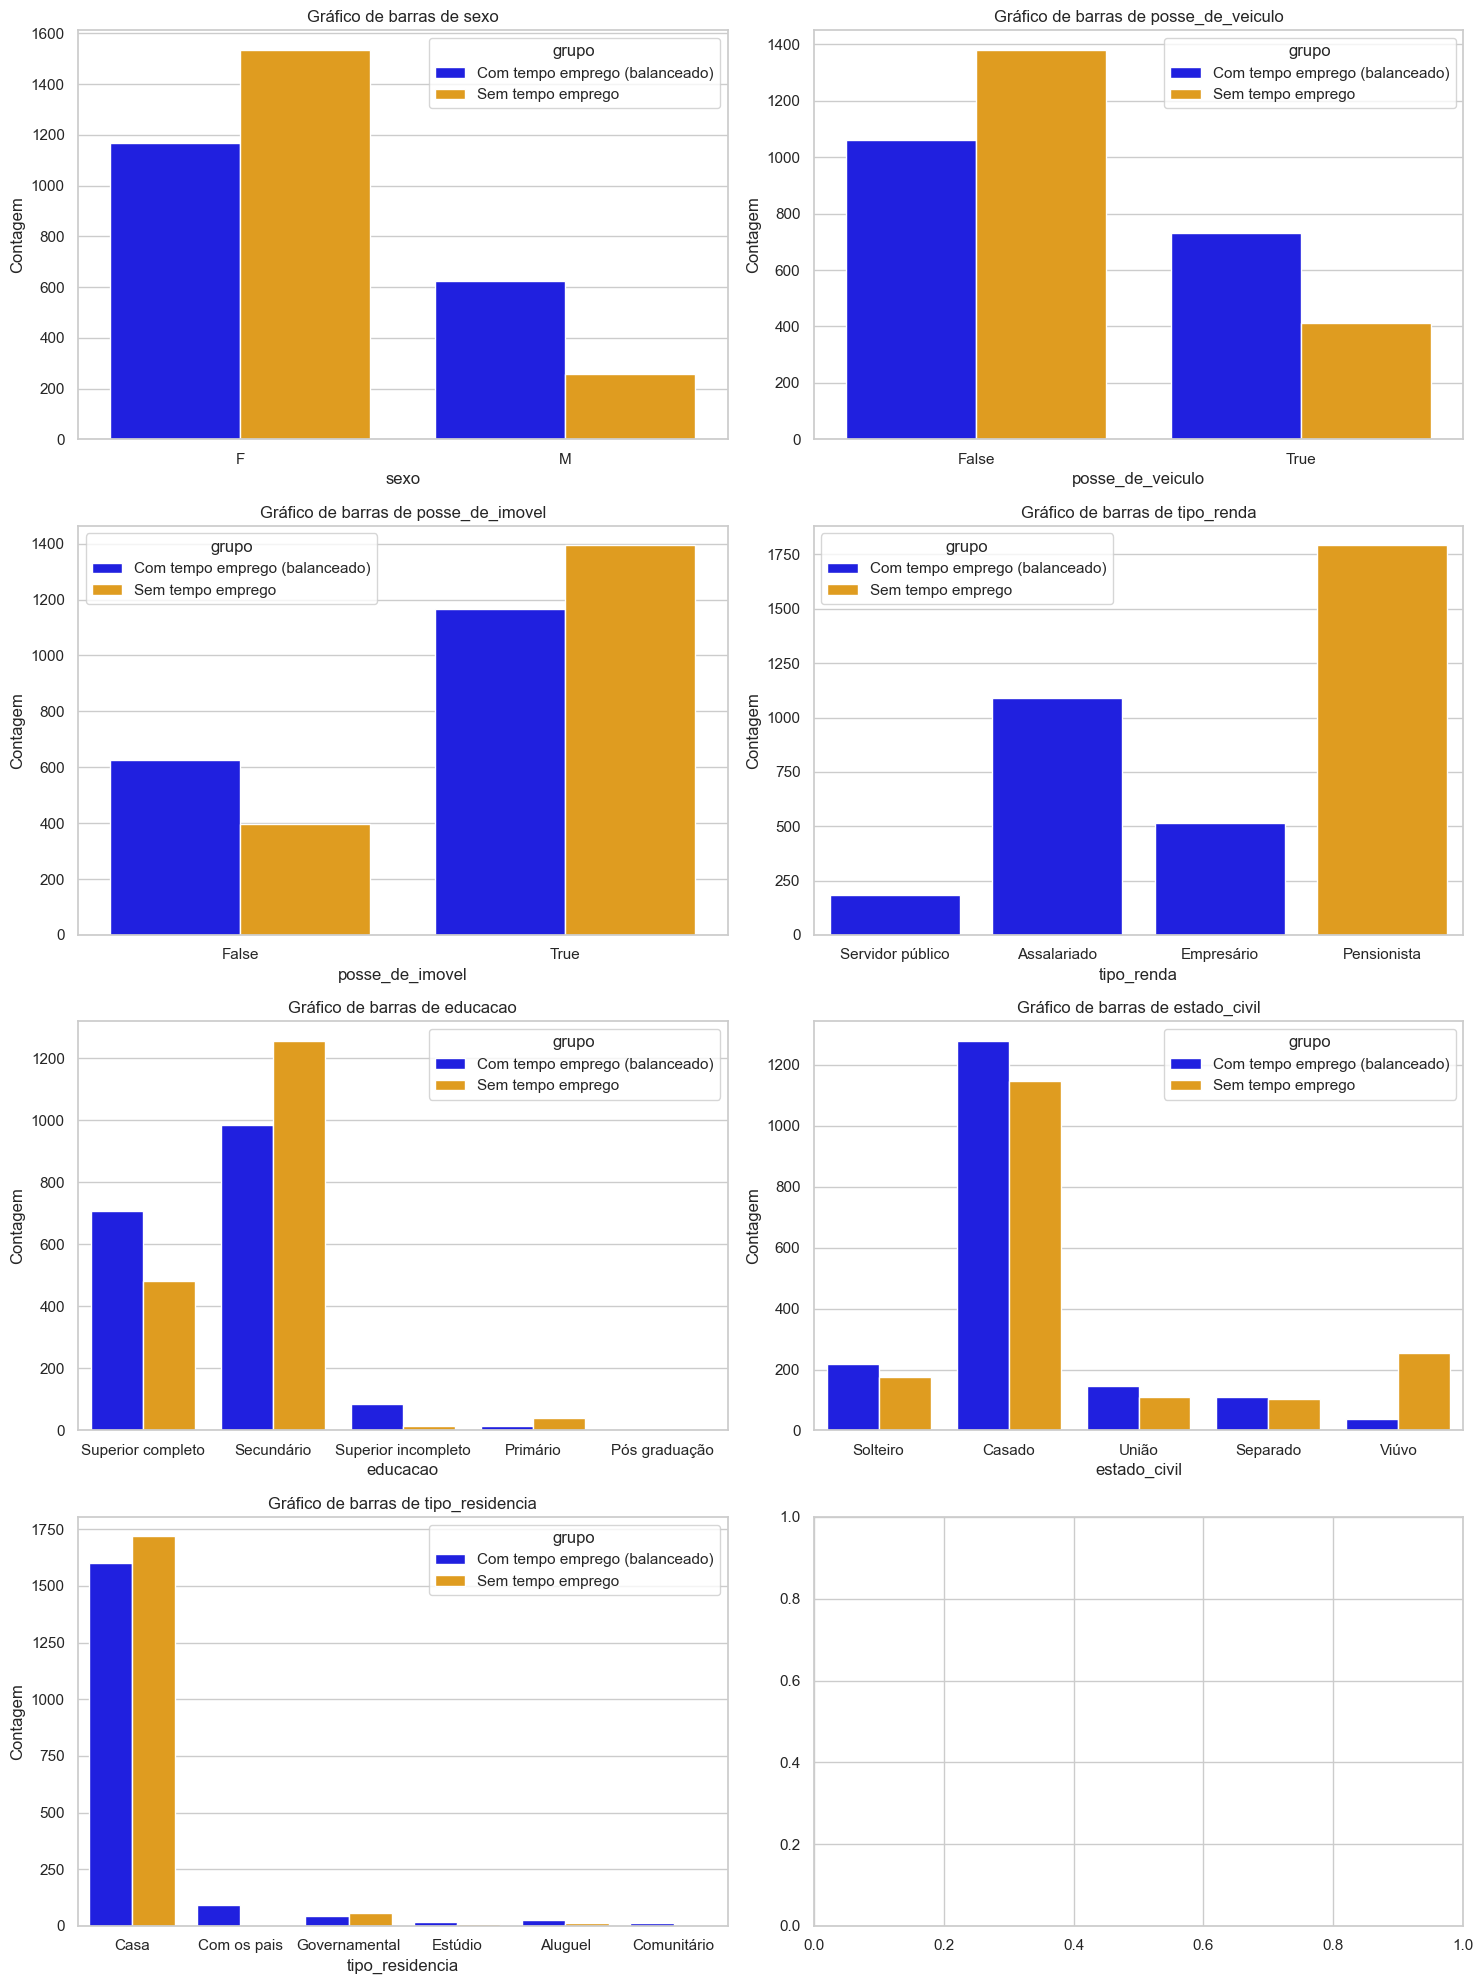

In [10]:
# Contando o número de variáveis categóricas
num_variaveis = len(variaveis_categoricas)  # Conta o número de variáveis categóricas na lista 'variaveis_categoricas'

# Definindo o número de colunas e calculando o número de linhas necessárias para os subgráficos
num_colunas = 2  # Número de colunas no layout dos subgráficos
num_linhas = (num_variaveis + num_colunas - 1) // num_colunas  # Calcula o número de linhas necessárias, ajustando para divisões

# Criando uma figura com subgráficos
fig, axes = plt.subplots(nrows=num_linhas, ncols=num_colunas, figsize=(15, 5*num_linhas))  # Cria a estrutura de subgráficos

# Ajustando o layout para facilitar o acesso aos eixos dos subgráficos
axes = axes.flatten()  # Flatten transforma o array de eixos em uma lista para acesso mais fácil

# Iterando sobre as variáveis categóricas para criar gráficos de barras
for i, var in enumerate(variaveis_categoricas):
    # Preparando os dados para o gráfico
    df_com_tempo_emprego_balanceado['grupo'] = 'Com tempo emprego (balanceado)'  # Adiciona uma coluna indicando o grupo
    df_sem_tempo_emprego_copy = df_sem_tempo_emprego.copy()  # Faz uma cópia do DataFrame sem 'tempo_emprego'
    df_sem_tempo_emprego_copy['grupo'] = 'Sem tempo emprego'  # Adiciona a mesma coluna para o outro grupo
    dados_concat = pd.concat([df_com_tempo_emprego_balanceado, df_sem_tempo_emprego_copy])  # Junta os dois DataFrames em um só

    # Criando o gráfico de barras com a contagem de categorias para cada variável
    sns.countplot(data=dados_concat, x=var, hue='grupo', palette=['blue', 'orange'], ax=axes[i])  # Cria o gráfico de barras para a variável
    axes[i].set_title(f'Gráfico de barras de {var}')  # Define o título do gráfico
    axes[i].set_xlabel(var)  # Define o nome do eixo x
    axes[i].set_ylabel('Contagem')  # Define o nome do eixo y

# Ajustando o layout para evitar sobreposição de elementos nos gráficos e exibindo o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()  # Exibe os gráficos


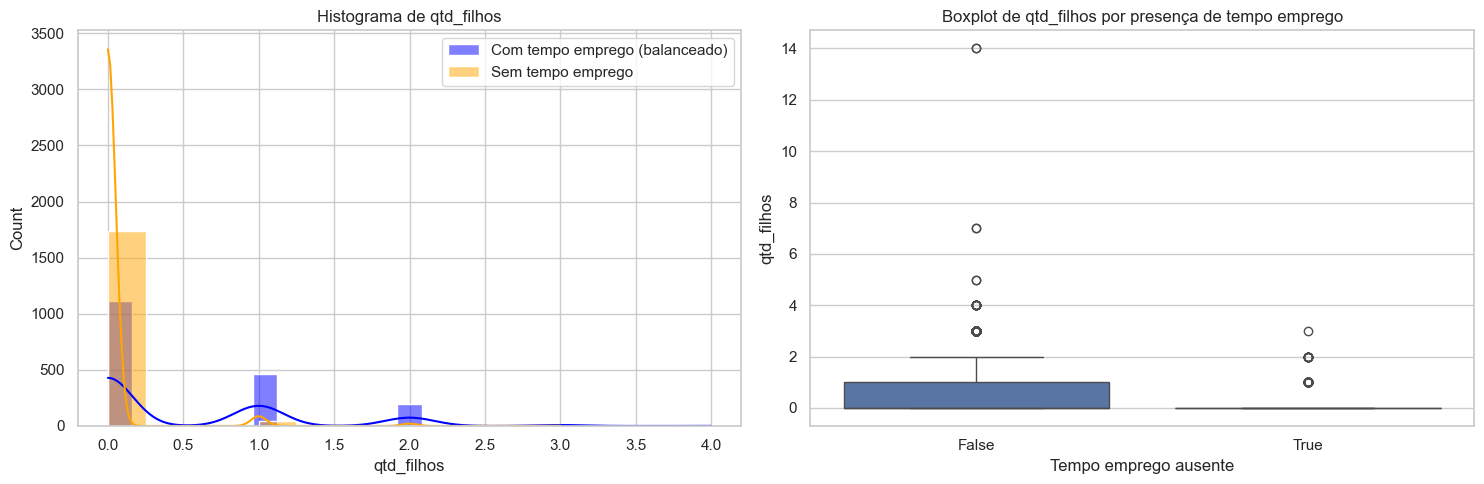

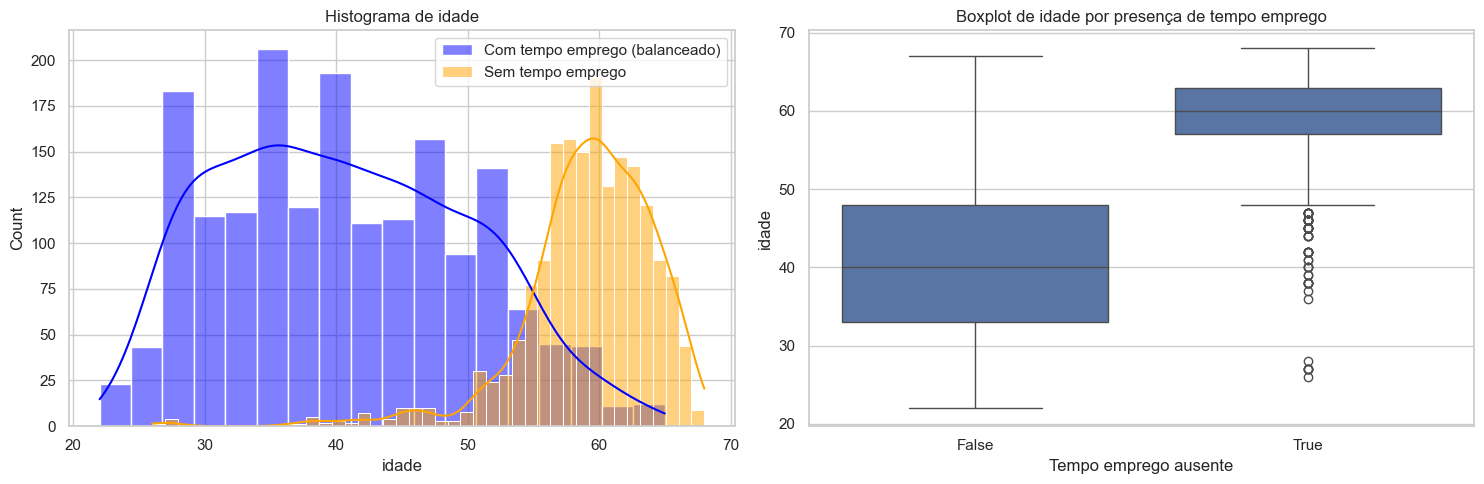

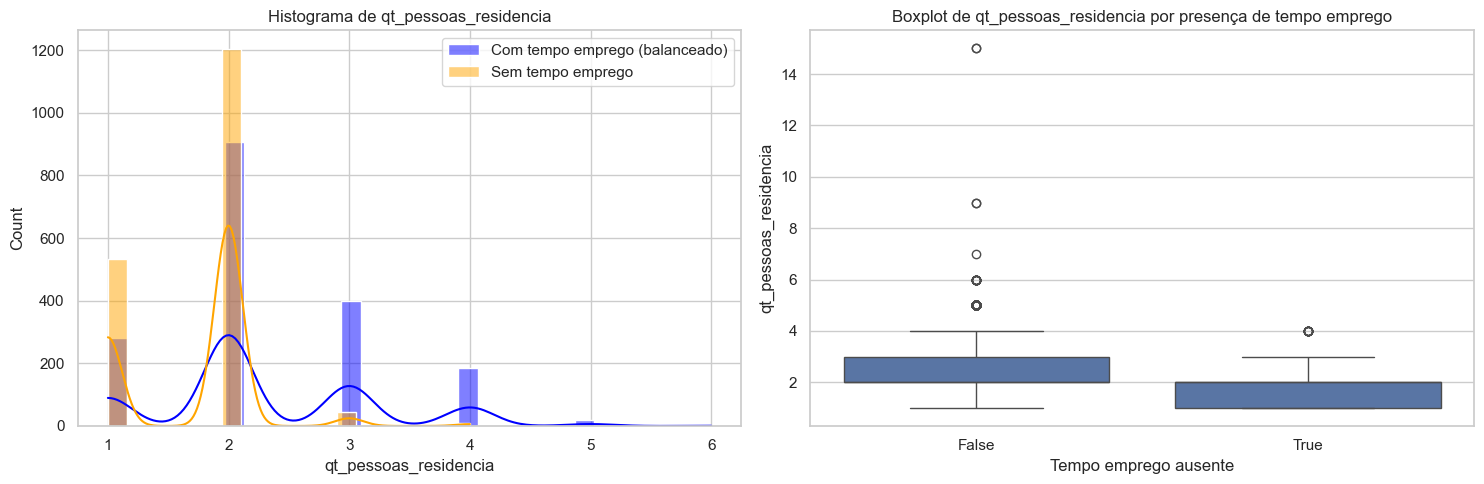

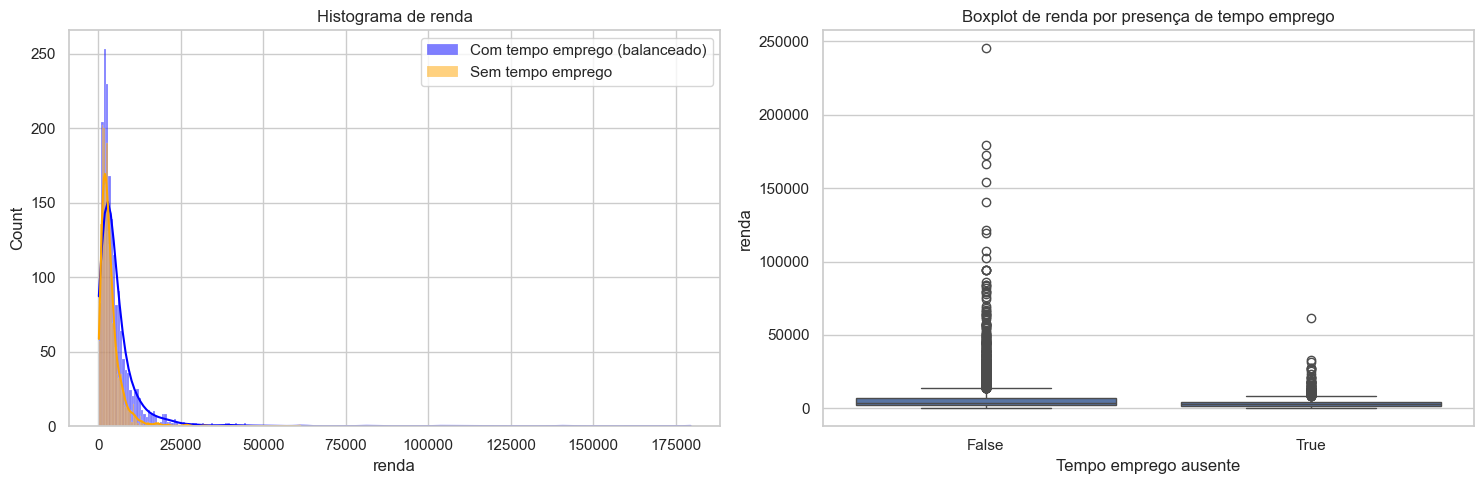

In [11]:
# Análise das variáveis contínuas, criando histogramas e boxplots para comparar as distribuições

for var in variaveis_continuas_sem_tempo_emprego:  # Iterando sobre cada variável contínua
    # Criando subgráficos para o histograma e o boxplot
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Cria uma figura com 1 linha e 2 colunas de subgráficos

    # Histograma
    sns.histplot(df_com_tempo_emprego_balanceado[var], color='blue', label='Com tempo emprego (balanceado)', kde=True, ax=axes[0])  # Histograma para o grupo 'Com tempo emprego'
    sns.histplot(df_sem_tempo_emprego[var], color='orange', label='Sem tempo emprego', kde=True, ax=axes[0])  # Histograma para o grupo 'Sem tempo emprego'
    axes[0].set_title(f'Histograma de {var}')  # Define o título do histograma
    axes[0].legend()  # Adiciona a legenda no gráfico de histograma

    # Boxplot
    sns.boxplot(data=renda, x=renda['tempo_emprego'].isnull(), y=var, ax=axes[1])  # Boxplot comparando a variável com base na presença de valores faltantes em 'tempo_emprego'
    axes[1].set_title(f'Boxplot de {var} por presença de tempo emprego')  # Define o título do boxplot
    axes[1].set_xlabel('Tempo emprego ausente')  # Define o rótulo do eixo X para o boxplot

    # Ajustando o layout para evitar sobreposição e exibindo os gráficos
    plt.tight_layout()  # Ajusta o layout dos gráficos para melhor visualização
    plt.show()  # Exibe os gráficos


In [12]:
# Filtrando os dados para verificar se todos os registros com 'tipo_renda' igual a 'Pensionista' estão no grupo sem tempo de emprego
pensionistas_sem_tempo_emprego = df_sem_tempo_emprego[df_sem_tempo_emprego['tipo_renda'] == 'Pensionista']  # Filtra o grupo sem 'tempo_emprego' para incluir apenas os 'Pensionista'

# Verificando o número total de registros no grupo sem 'tempo_emprego'
total_sem_tempo_emprego = df_sem_tempo_emprego.shape[0]  # Conta o total de registros no grupo sem 'tempo_emprego'

# Verificando o número de 'Pensionista' no grupo sem 'tempo_emprego'
total_pensionistas_sem_tempo_emprego = pensionistas_sem_tempo_emprego.shape[0]  # Conta o total de 'Pensionista' no grupo sem 'tempo_emprego'

# Exibindo as informações
print(f"Total de registros sem 'tempo_emprego': {total_sem_tempo_emprego}")  # Exibe o total de registros sem 'tempo_emprego'
print(f"Total de 'Pensionista' no grupo sem 'tempo_emprego': {total_pensionistas_sem_tempo_emprego}")  # Exibe o total de 'Pensionista' no grupo sem 'tempo_emprego'

# Verificando se todos os registros do grupo sem 'tempo_emprego' são 'Pensionista'
if total_sem_tempo_emprego == total_pensionistas_sem_tempo_emprego:  # Se o número de pensionistas for igual ao total do grupo
    print("Todos os registros sem 'tempo_emprego' são 'Pensionista'.")  # Mensagem indicando que todos os registros são 'Pensionista'
else:
    print("Nem todos os registros sem 'tempo_emprego' são 'Pensionista'.")  # Mensagem indicando que nem todos são 'Pensionista'


Total de registros sem 'tempo_emprego': 1792
Total de 'Pensionista' no grupo sem 'tempo_emprego': 1792
Todos os registros sem 'tempo_emprego' são 'Pensionista'.


Ao analisar ambos os dataframes, os que possuem e os que não possuem 'tempo_emprego', podemos considerar o seguinte:

- A predominância de indivíduos que não possuem 'tempo_emprego' são pessoas de mais idade (50+).
- Todos que não possuem 'tempo_emprego' são pensionistas.
- O grupo de pessoas sem 'tempo_emprego' possui, em geral, medianas parecidas em relação ao outro grupo.

Considerações importantes para a implementação do modelo:

- Valores discrepantes de renda geralmente ocorrem no grupo de pessoas que possuem 'tempo_emprego'.
- Os dois grupos (pessoas sem e com emprego) não discriminam de modo relevante a renda entre si.
- Há variáveis com poucos registros, principalmente em relação a 'educação', 'estado_civil' e 'tipo_residencia', assim como outros valores em variáveis contínuas. Variáveis desse tipo, que principalmente não apresentam comportamento diferente em relação aos outros dados, podem causar ruído no modelo de regressão.



## Análise bivariada

Nesta etapa, avalio as variáveis em relação à variável target ('renda').

In [13]:
# Definindo a lista de variáveis contínuas adicionais
variaveis_continuas2= ['qtd_filhos', 'idade', 'qt_pessoas_residencia', 'tempo_emprego']

# Função para analisar variáveis categóricas em relação ao target
def analyze_categorical(df, categorical_vars, target):
    n = len(categorical_vars)  # Obtém o número de variáveis categóricas a serem analisadas
    cols = 2  # Definindo 2 colunas para cada variável (boxplot + gráfico de barras)
    rows = math.ceil(n / 2)  # Calcula o número de linhas necessárias para acomodar as variáveis (arredondando para cima)
    
    # Criando os subgráficos
    fig, axes = plt.subplots(rows, 2 * cols, figsize=(20, rows * 6))  # Criando uma figura com as linhas e colunas definidas
    axes = axes.flatten()  # Flatten para acessar os eixos de maneira mais fácil
    
    # Iterando sobre as variáveis categóricas
    for i, var in enumerate(categorical_vars):
        # Boxplot
        sns.boxplot(data=df, x=var, y=target, ax=axes[2 * i])  # Criando o boxplot de 'target' por cada variável categórica
        axes[2 * i].set_title(f"Boxplot de {target} por {var}")  # Título do boxplot
        axes[2 * i].set_xlabel(var)  # Rótulo do eixo X
        axes[2 * i].set_ylabel(target)  # Rótulo do eixo Y
        axes[2 * i].tick_params(axis='x', rotation=45)  # Rotaciona os rótulos do eixo X para evitar sobreposição
        
        # Gráfico de barras
        sns.barplot(
            data=df,  # Dados do DataFrame
            x=var,  # Variável categórica no eixo X
            y=target,  # Variável alvo (target) no eixo Y
            estimator='mean',  # Calcula a média de 'target' para cada categoria de 'var'
            errorbar=None,  # Remove as barras de erro
            ax=axes[2 * i + 1],  # Define o eixo onde o gráfico será desenhado
            hue=var,  # Usa 'hue' para diferenciar as barras pela variável categórica
            palette="Set2",  # Define a paleta de cores
            legend=False  # Desativa a legenda redundante
        )
        axes[2 * i + 1].set_title(f"Média de {target} por {var}")  # Título do gráfico de barras
        axes[2 * i + 1].set_xlabel(var)  # Rótulo do eixo X
        axes[2 * i + 1].set_ylabel(f"Média de {target}")  # Rótulo do eixo Y
        axes[2 * i + 1].tick_params(axis='x', rotation=45)  # Rotaciona os rótulos do eixo X para evitar sobreposição
    
    # Remover subgráficos não utilizados (caso o número de variáveis categóricas seja ímpar)
    for j in range(2 * len(categorical_vars), len(axes)):
        fig.delaxes(axes[j])  # Deleta os eixos extras que não serão usados
    
    # Ajustando o layout para melhor visualização
    plt.tight_layout()  # Ajusta o layout dos subgráficos
    plt.show()  # Exibe os gráficos


# Função para análise de variáveis contínuas
def analyze_continuous(df, continuous_vars, target):
    n = len(continuous_vars)  # Quantidade de variáveis contínuas
    cols = 2  # Definindo o número de colunas
    rows = math.ceil(n / cols)  # Número de linhas necessárias para acomodar todos os gráficos
    
    # Criando a figura e os subgráficos
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))  # Criando os subgráficos
    axes = axes.flatten()  # Facilita o acesso aos eixos
    
    # Plotando os gráficos para cada variável contínua
    for i, var in enumerate(continuous_vars):
        # Gráfico de dispersão
        sns.scatterplot(data=df, x=var, y=target, alpha=0.7, color='b', ax=axes[i])
        # Linha de regressão
        sns.regplot(data=df, x=var, y=target, scatter=False, color='r', ax=axes[i])
        axes[i].set_title(f"Relação entre {var} e {target}")  # Título do gráfico
        axes[i].set_xlabel(var)  # Rótulo do eixo X
        axes[i].set_ylabel(target)  # Rótulo do eixo Y
    
    # Remover subgráficos não utilizados (caso haja um número ímpar de variáveis contínuas)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])  # Deleta os eixos extras que não são necessários
    
    # Ajustando o layout dos subgráficos para uma visualização melhor
    plt.tight_layout()  # Ajusta automaticamente os subgráficos
    plt.show()  # Exibe os gráficos

            

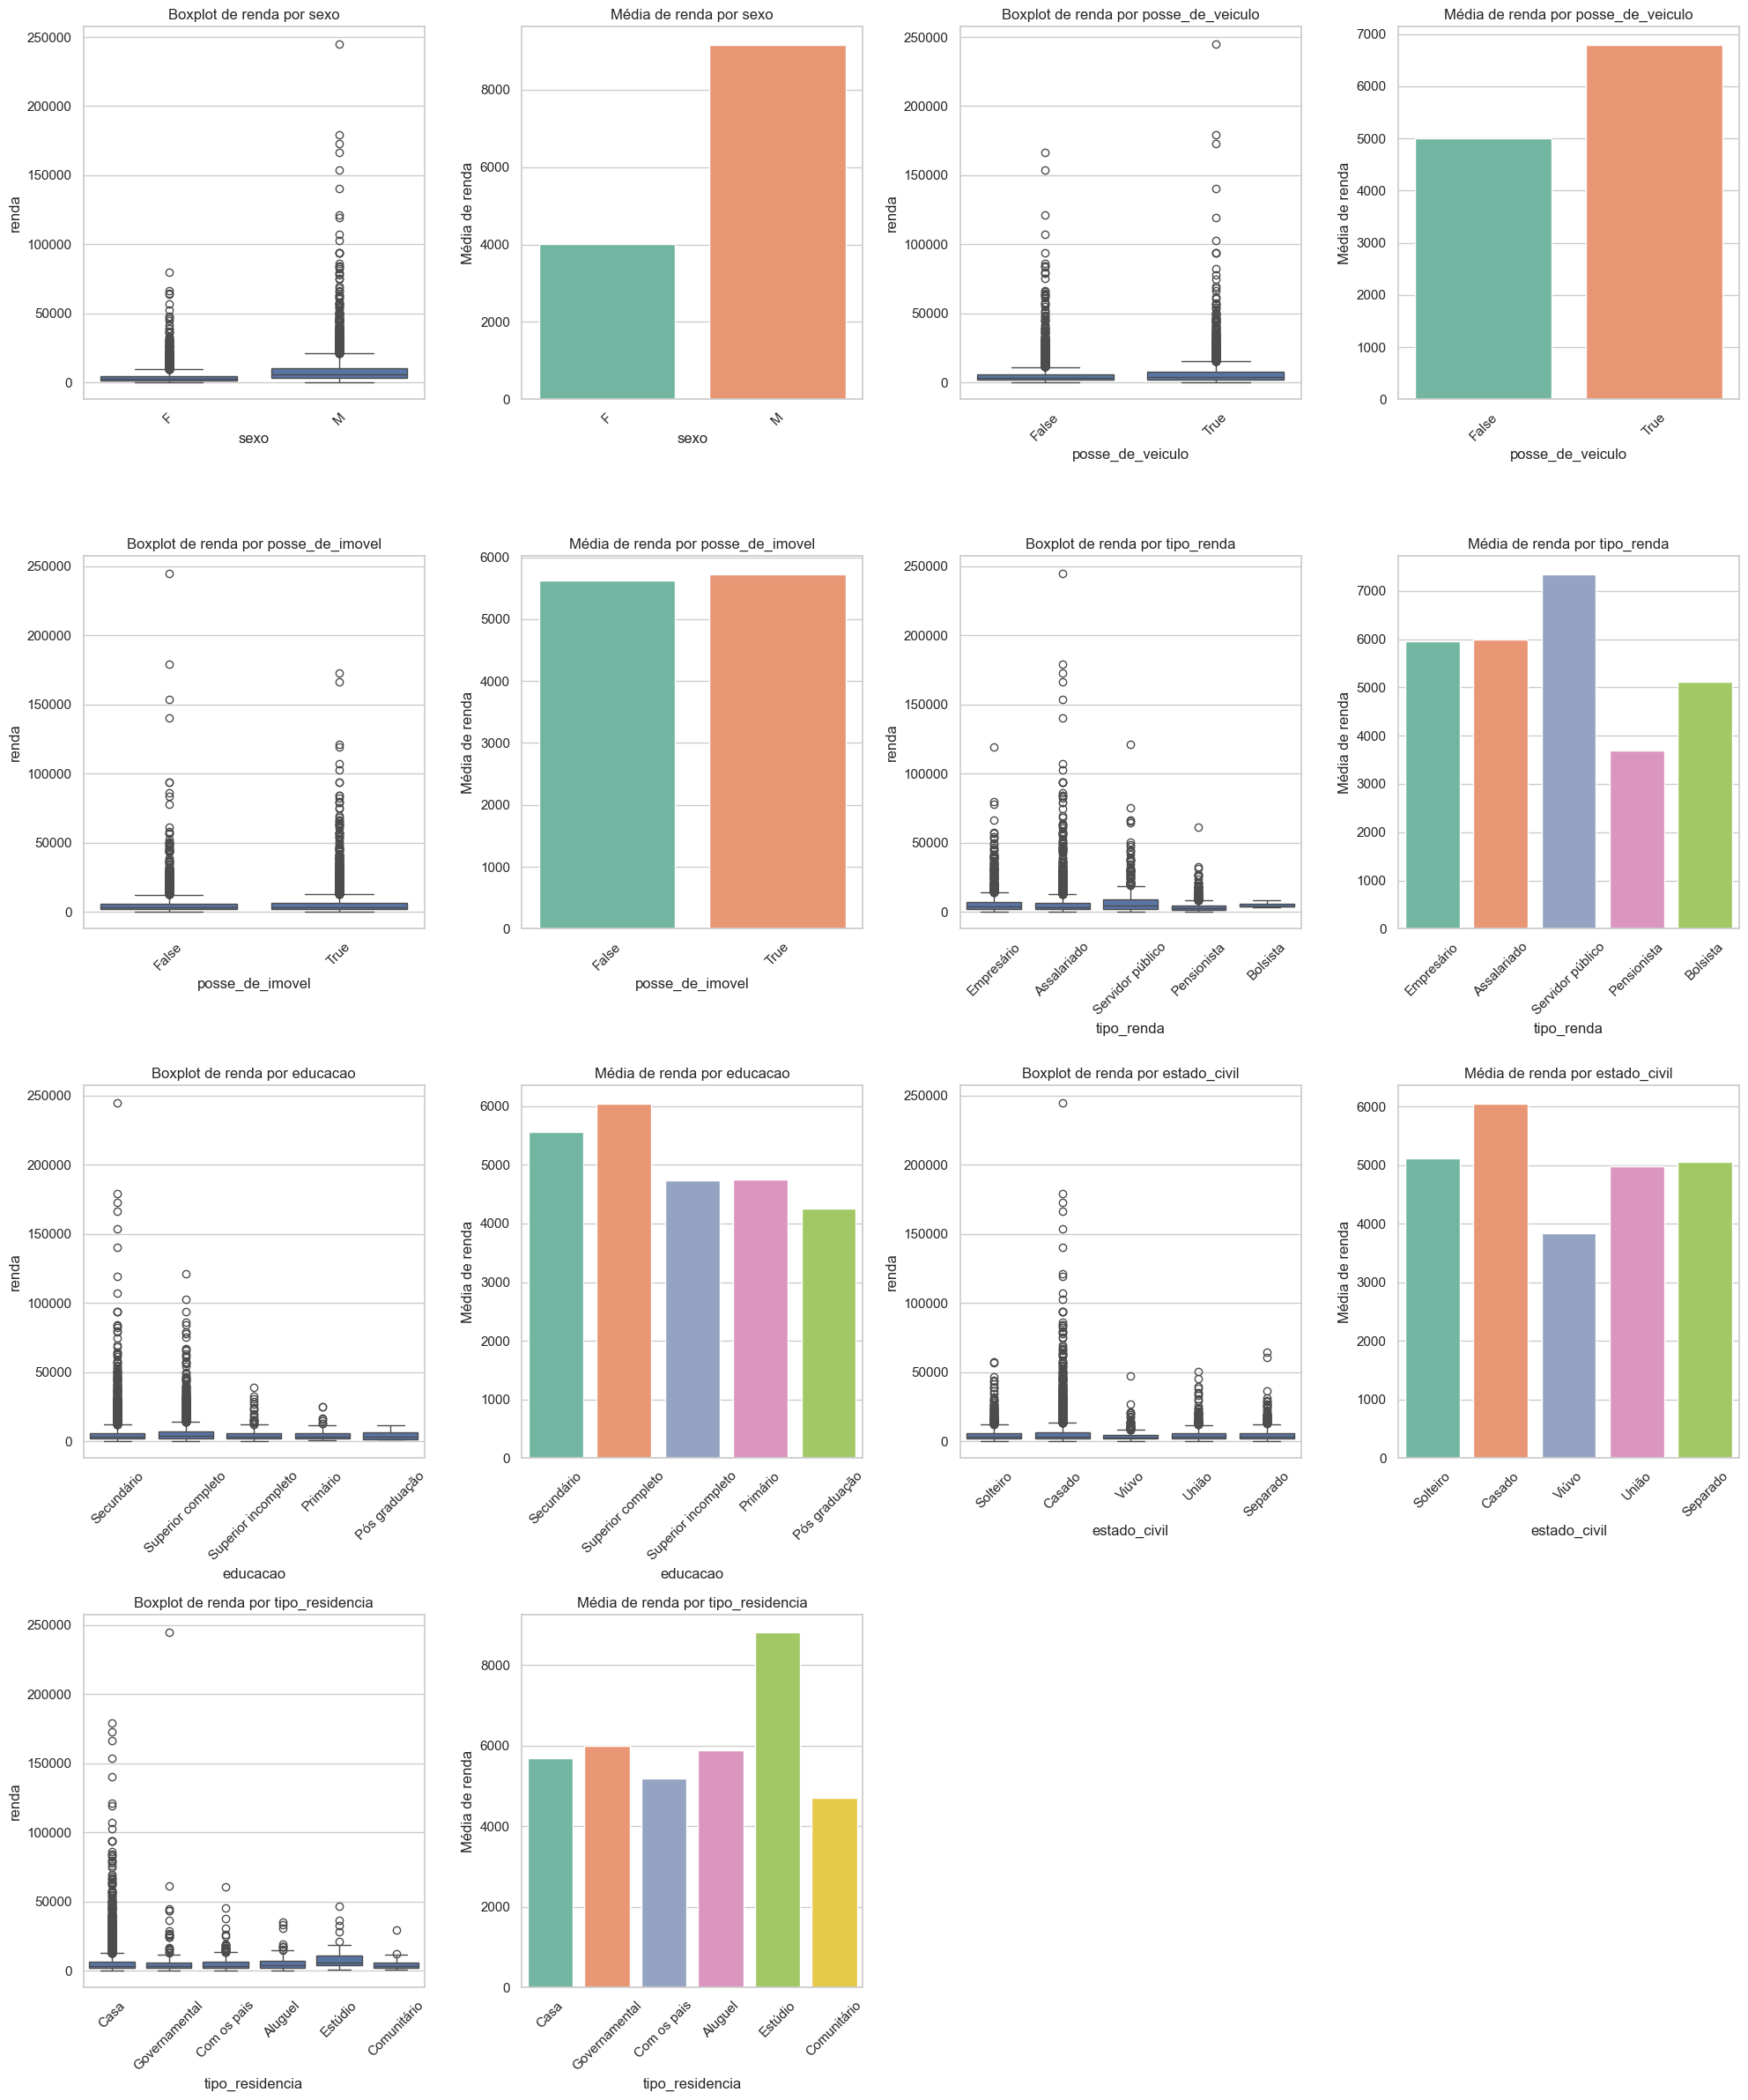

In [14]:
# Chamando a função analyze_categorical para analisar as variáveis categóricas em relação à variável 'renda'
analyze_categorical(renda, variaveis_categoricas, 'renda')


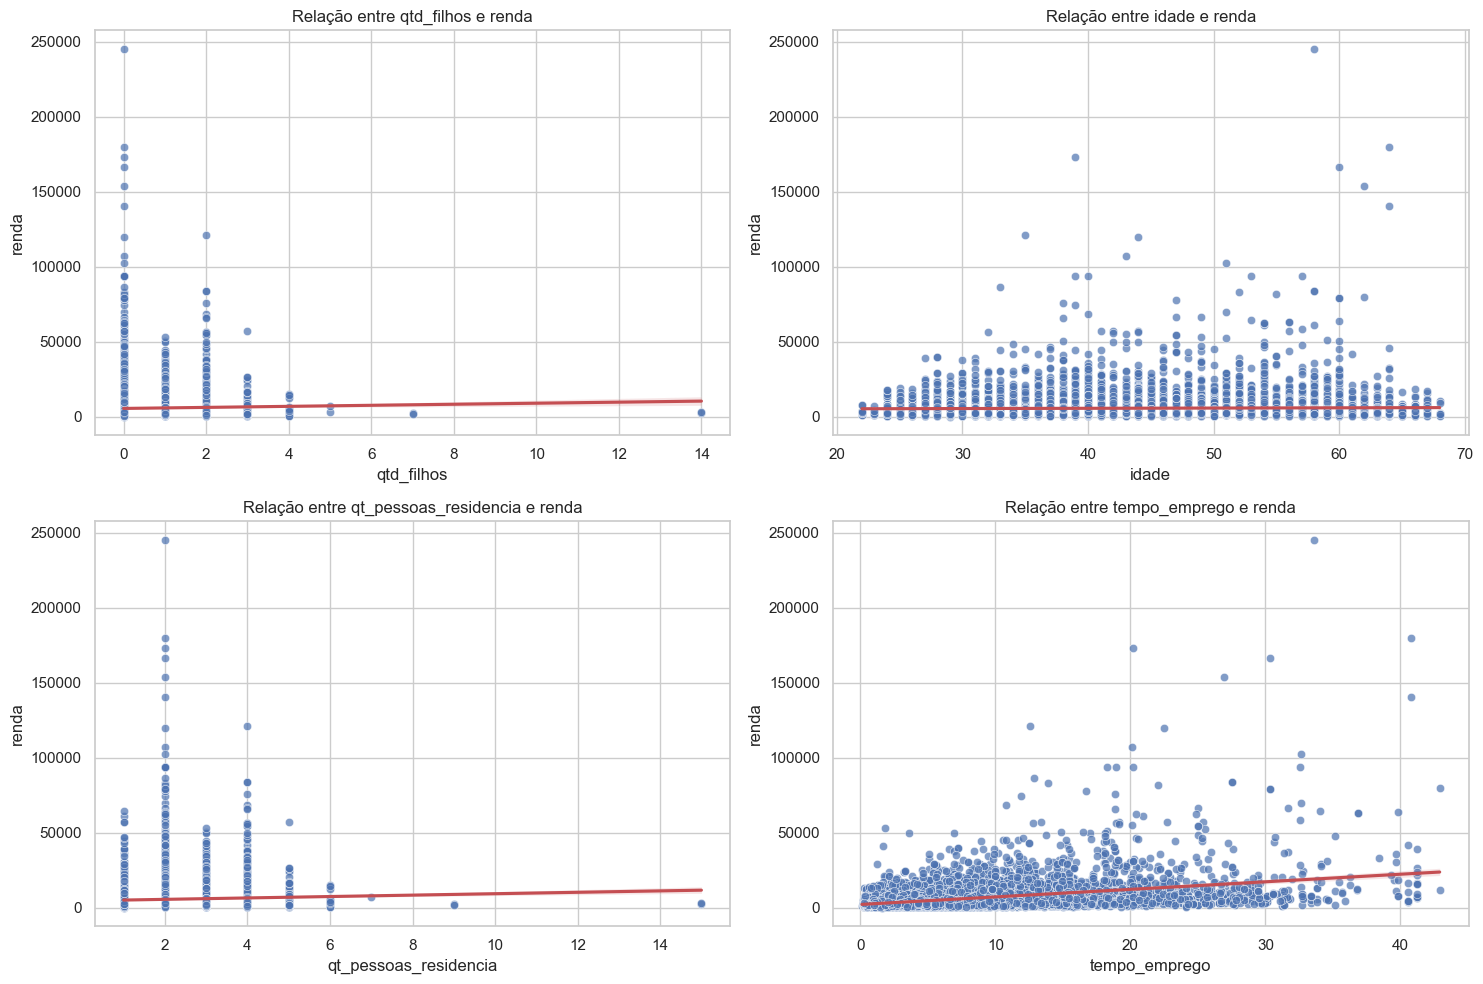

In [15]:
# Chamando a função analyze_continuous para analisar as variáveis contínuas em relação à variável 'renda'
analyze_continuous(renda, variaveis_continuas2, 'renda')


In [16]:
renda.describe()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
count,10447.000000,10447.000000,8655.000000,10447.000000,10447.000000
mean,0.434287,43.920934,7.795977,2.208098,5697.840604
std,0.752724,11.249161,6.740480,0.913950,8415.826368
min,0.000000,22.000000,0.117808,1.000000,118.710000
25%,0.000000,34.000000,3.046575,2.000000,2016.855000
50%,0.000000,43.000000,6.052055,2.000000,3512.680000
75%,1.000000,53.000000,10.268493,3.000000,6383.595000
max,14.000000,68.000000,42.906849,15.000000,245141.670000


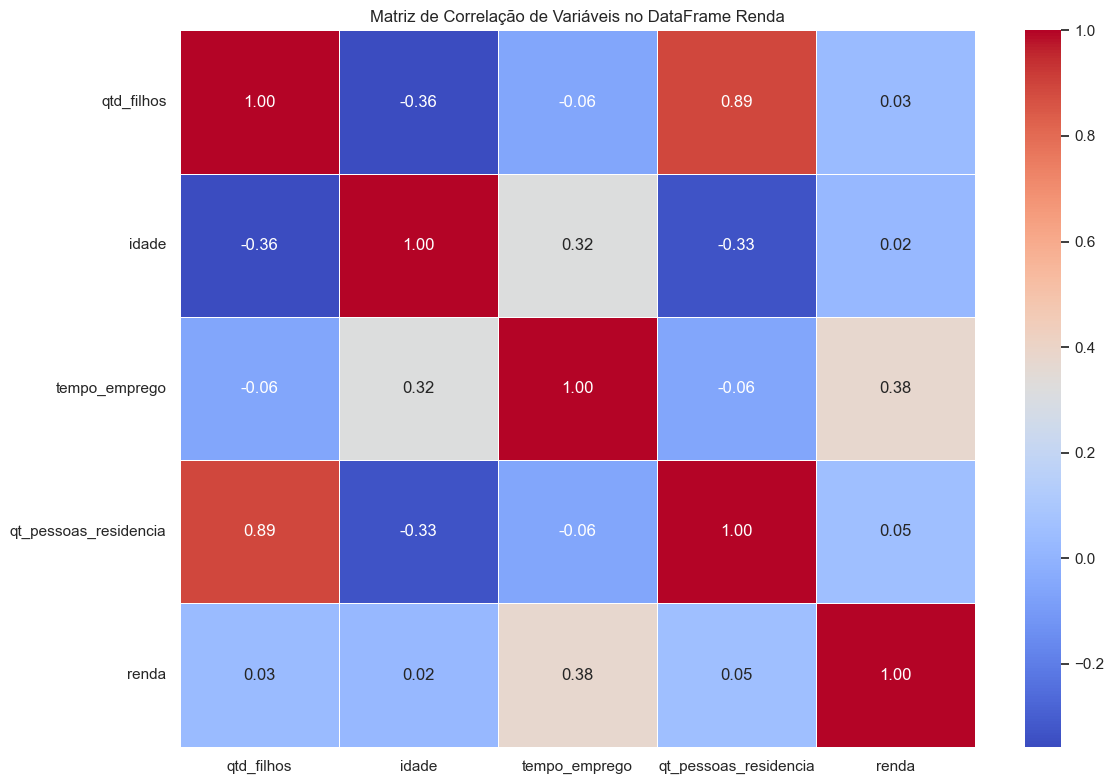

In [17]:
# Selecionando apenas as colunas numéricas do DataFrame 'renda'
renda_numerica = renda.select_dtypes(include=['number'])

# Calculando a matriz de correlação entre as variáveis numéricas
correlation_matrix = renda_numerica.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(12, 8))  # Definindo o tamanho da figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)  # Criando o heatmap
plt.title('Matriz de Correlação de Variáveis no DataFrame Renda')  # Título do gráfico
plt.tight_layout()  # Ajustando o layout para evitar sobreposição
plt.show()  # Exibindo o gráfico


## Conclusão das analises:

Em resumo, os dados contidos na variável 'renda' no dataframe não apresentam uma discriminação significativa entre os grupos. Isso significa que não há padrões claros que facilitem a identificação de relações consistentes com a variável target. A informação de que um indivíduo é pensionista não fornece insights relevantes, já que essa categoria abrange uma grande diversidade de casos. Dentro do grupo de pensionistas por exeplo, existem tanto aqueles que possuem carro quanto os que não possuem, tornando difícil estabelecer uma relação direta. Além disso, a variável 'renda' não apresenta uma correlação forte com outros atributos da base de dados. Essa análise reforça a importância de lidar com dados complexos e, em alguns casos, aceitar que eles podem ser tão imprevisíveis quanto as situações da vida cotidiana.

Abaixo, finalizamos esta parte da análise nos despedindo de todos os pensionistas do nosso dataset, pois, para prever a renda, eles não nos ajudam muito e também, não podemos contruir nosso modelo com dados faltantes.



In [18]:
# Removendo as linhas onde a coluna 'tempo_emprego' tem valores nulos
renda = renda.dropna(subset=['tempo_emprego'])

# Exibindo informações sobre o DataFrame 'renda', incluindo a contagem de valores não nulos
renda.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8655 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   8655 non-null   object 
 1   posse_de_veiculo       8655 non-null   bool   
 2   posse_de_imovel        8655 non-null   bool   
 3   qtd_filhos             8655 non-null   int64  
 4   tipo_renda             8655 non-null   object 
 5   educacao               8655 non-null   object 
 6   estado_civil           8655 non-null   object 
 7   tipo_residencia        8655 non-null   object 
 8   idade                  8655 non-null   int64  
 9   tempo_emprego          8655 non-null   float64
 10  qt_pessoas_residencia  8655 non-null   float64
 11  renda                  8655 non-null   float64
dtypes: bool(2), float64(3), int64(2), object(5)
memory usage: 760.7+ KB


---

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. 


Bom, este portfólio está sendo construído no dia 11/01/2025, e, no momento, estou no último ano da minha faculdade e na metade do meu curso de Ciência de Dados na EBAC. Com isso, quero dizer que meus modelos ainda são modestos; conheço apenas alguns e vou aplicar o que tenho mais familiaridade, que é o modelo de regressão.

### Rodando o modelo


Nesta etapa, rodei três modelos de regressão diferentes:

- resultado: modelo criado utilizando todas as variáveis do meu conjunto de dados.
- resultado2: modelo utilizando apenas as variáveis que a função stepwise me indicou.
- resultado3: modelo criado com as mesmas variáveis do modelo 'resultado2', porém com o log aplicado na variável 'renda'."

In [19]:
# Aplicando a codificação one-hot nas variáveis categóricas, removendo a primeira categoria para evitar multicolinearidade
renda = pd.get_dummies(renda, drop_first=True)

# Selecionando as colunas do tipo booleano no DataFrame 'renda'
bool_columns = renda.select_dtypes(include=['bool']).columns

# Convertendo as colunas booleanas para 1 e 0
renda[bool_columns] = renda[bool_columns].astype(int)

# Separando as variáveis independentes (X) e a variável dependente (y)
X = renda.drop(columns=["renda"])  # Removendo a coluna 'renda' para X
y = renda["renda"]  # A variável alvo é a coluna 'renda'

# Dividindo os dados em conjuntos de treino e teste, com 25% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Adicionando uma constante (termo de interceptação) aos dados de treino e teste para o modelo de regressão
X_train = sm.add_constant(X_train)
x_test = sm.add_constant(X_test)


In [20]:
# Criando o modelo de Regressão Linear Ordinária (OLS) com os dados de treino
modelo = sm.OLS(y_train, X_train)

# Ajustando o modelo aos dados de treino
resultado = modelo.fit()

# Exibindo o resumo estatístico do modelo
print(resultado.summary())


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     86.96
Date:                Sun, 12 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:09:49   Log-Likelihood:                -67514.
No. Observations:                6491   AIC:                         1.351e+05
Df Residuals:                    6466   BIC:                         1.352e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

## stepwise_selection

A função stepwise_selection realiza a seleção de variáveis para um modelo de regressão utilizando uma abordagem de inclusão e exclusão baseada no p-value. Ela combina os métodos de Forward Selection e Backward Elimination, adicionando variáveis com p-value abaixo de um limiar definido (threshold_in) e removendo aquelas com p-value acima de outro limiar (threshold_out).

No modelo em questão, o critério escolhido foi exclusivamente o p-value, que avalia a significância estatística de cada variável. Isso significa que apenas variáveis com impacto estatisticamente relevante sobre a variável dependente foram incluídas, enquanto aquelas sem relevância significativa foram removidas. Essa abordagem garante um modelo mais parcimonioso e alinhado com a significância estatística dos dados.

In [21]:
def stepwise_selection(X_train, y_train, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out=0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS 
    Args:
        X_train (DataFrame): Conjunto de variáveis independentes.
        y_train (Series): Variável dependente.
        initial_list (list): Lista inicial de variáveis incluídas (default: vazia).
        threshold_in (float): Limiar para inclusão de uma variável.
        threshold_out (float): Limiar para exclusão de uma variável.
        verbose (bool): Se True, imprime informações sobre cada passo.
    Returns:
        list: Lista de variáveis selecionadas.
    """
    included = list(initial_list)  # Lista de variáveis incluídas inicialmente

    while True:
        changed = False
        
        # Forward step: Avalia variáveis para inclusão
        excluded = list(set(X_train.columns) - set(included))  # Variáveis ainda não incluídas
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))  # Para armazenar os p-valores
        
        for new_column in excluded:
            # Ajusta o modelo com a nova variável candidata
            model = sm.OLS(y_train, sm.add_constant(X_train[included + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]  # Coleta o p-value da variável

        best_pval = new_pval.min()  # Menor p-value entre as variáveis candidatas
        
        # Inclui variável se o p-value for menor que o limiar de inclusão
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()  # Variável com o menor p-value
            included.append(best_feature)
            changed = True
            if verbose:
                print(f'Add  {best_feature:30} with p-value {best_pval:.6f}')

        # Backward step: Avalia variáveis para exclusão
        if len(included) > 0:
            # Ajusta o modelo com as variáveis atualmente incluídas
            model = sm.OLS(y_train, sm.add_constant(X_train[included])).fit()
            pvalues = model.pvalues.iloc[1:]  # Ignora o intercepto
            worst_pval = pvalues.max()  # Maior p-value entre as variáveis incluídas
            
            # Remove variável se o p-value for maior que o limiar de exclusão
            if worst_pval > threshold_out:
                worst_feature = pvalues.idxmax()  # Variável com o maior p-value
                included.remove(worst_feature)
                changed = True
                if verbose:
                    print(f'Drop {worst_feature:30} with p-value {worst_pval:.6f}')

        # Se não houve mudanças (nem inclusão nem exclusão), termina o processo
        if not changed:
            break
    
    return included

# Chamando a função de seleção stepwise
# X_train: DataFrame de variáveis independentes (com constante adicionada previamente)
# y_train: Variável dependente
variaveis = stepwise_selection(X_train, y_train)

print('resulting features:')
print(variaveis)


Add  const                          with p-value 0.000000
Add  tempo_emprego                  with p-value 0.000000
Add  sexo_M                         with p-value 0.000000
Add  idade                          with p-value 0.000386
Add  educacao_Superior completo     with p-value 0.000373
Add  tipo_renda_Empresário          with p-value 0.000856
resulting features:
['const', 'tempo_emprego', 'sexo_M', 'idade', 'educacao_Superior completo', 'tipo_renda_Empresário']


In [22]:
# Definindo as variáveis relevantes com base na seleção de features
relevant_features = ['sexo_M', 'tempo_emprego', 'tipo_renda_Empresário', 
                     'idade', 'educacao_Superior completo', 'posse_de_imovel']

# Selecionando apenas as variáveis relevantes do conjunto de treino
X_train_relevantes = X_train[relevant_features]

# Adicionando a constante (intercepto) para o modelo de regressão
X_train_relevantes = sm.add_constant(X_train_relevantes)

# Criando o modelo de regressão OLS (Ordinary Least Squares)
modelo = sm.OLS(y_train, X_train_relevantes)

# Treinando o modelo com os dados de treino
resultado2 = modelo.fit()

# Exibindo o resumo estatístico do modelo ajustado
print(resultado2.summary())


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     346.0
Date:                Sun, 12 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:09:56   Log-Likelihood:                -67520.
No. Observations:                6491   AIC:                         1.351e+05
Df Residuals:                    6484   BIC:                         1.351e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## O uso do np.log() na variavél target

Transformar uma variável target em log é uma técnica usada para lidar com dados que apresentam distribuições altamente assimétricas (skewed) ou valores extremos (outliers). Aplicando o logaritmo, os valores são comprimidos, reduzindo a influência de valores muito altos e aproximando a distribuição de uma forma mais simétrica. Isso é particularmente útil em modelos de regressão, pois melhora a interpretação dos resultados e a performance do modelo. Após a transformação, é importante lembrar de reverter a escala (exponencial) para interpretar os resultados no contexto original.

In [26]:
# Aplicando a transformação logarítmica na variável dependente
y_train_log = np.log(y_train)

# Criando o modelo de regressão OLS com a variável dependente transformada
modelo = sm.OLS(y_train_log, X_train_relevantes)

# Ajustando o modelo com os dados de treino
resultado3 = modelo.fit()

# Exibindo o resumo estatístico do modelo ajustado
print(resultado3.summary())


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     609.0
Date:                Sun, 12 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:15:59   Log-Likelihood:                -7119.2
No. Observations:                6491   AIC:                         1.425e+04
Df Residuals:                    6484   BIC:                         1.430e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Etapa 5 Crisp-DM: Avaliação dos resultados


In [ ]:
# Adicionar uma constante (intercepto) ao conjunto de teste X_test
X_test_const = sm.add_constant(X_test)

# Fazer previsões utilizando o modelo 'resultado' (modelo inicial com todas as variáveis)
y_pred1 = resultado.predict(X_test_const)

# Selecionar apenas as variáveis relevantes no conjunto de teste
X_test_relevantes = X_test[relevant_features]

# Adicionar uma constante (intercepto) ao conjunto de teste com variáveis relevantes
X_test_relevantes = sm.add_constant(X_test_relevantes)

# Fazer previsões utilizando o modelo 'resultado2' (modelo com variáveis relevantes)
y_pred2 = resultado2.predict(X_test_relevantes)

# Fazer previsões utilizando o modelo 'resultado3' (modelo com variáveis relevantes e y transformado)
y_pred3 = resultado3.predict(X_test_relevantes)


In [32]:
# Calculando o Mean Squared Error (MSE) para o modelo inicial 'resultado'
mse1 = mean_squared_error(y_test, y_pred1)

# Calculando o Mean Squared Error (MSE) para o modelo com variáveis relevantes 'resultado2'
mse2 = mean_squared_error(y_test, y_pred2)

# Calculando o Mean Squared Error (MSE) para o modelo com transformação logarítmica 'resultado3'
# Nota: Aqui o y_pred3 precisa ser transformado para a escala exponencial para comparação correta com y_test
mse3 = mean_squared_error(y_test, np.exp(y_pred3))

# Exibindo os valores de MSE para cada modelo
print(f"MSE para o modelo 'resultado': {mse1}")
print(f"MSE para o modelo 'resultado2': {mse2}")
print(f"MSE para o modelo 'resultado3': {mse3}")


MSE para o modelo 'resultado': 55394348.50795509
MSE para o modelo 'resultado2': 55235105.31462136
MSE para o modelo 'resultado3': 48332486.066854805


In [34]:
# Calcular o RMSE (Root Mean Squared Error) para o modelo inicial 'resultado'
# O RMSE é a raiz quadrada do MSE e fornece a métrica de erro na mesma unidade da variável dependente.
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred1))

# Calcular o RMSE para o modelo com variáveis relevantes 'resultado2'
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))

# Calcular o RMSE para o modelo com transformação logarítmica 'resultado3'
# Nota: Como o modelo 'resultado3' foi ajustado com os valores logarítmicos, y_test precisa ser transformado para a escala logarítmica
rmse3 = np.sqrt(mean_squared_error(y_test,np.exp(y_pred3)))

# Exibindo os resultados de RMSE para os três modelos
print(f"RMSE para o modelo 'resultado': {rmse1}")
print(f"RMSE para o modelo 'resultado2': {rmse2}")
print(f"RMSE para o modelo 'resultado3': {rmse3}")


RMSE para o modelo 'resultado': 7442.73797120086
RMSE para o modelo 'resultado2': 7432.032381160711
RMSE para o modelo 'resultado3': 6952.156936293571


### Tá, mas o que isso significa??

# Análise do RMSE (Root Mean Squared Error) dos Modelos

## O que é RMSE?
O **RMSE (Root Mean Squared Error)** é uma métrica que avalia o erro médio das previsões de um modelo, com penalização maior para erros grandes devido à elevação ao quadrado dos resíduos. Ele é calculado como:

\[
RMSE = \sqrt{\frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{n}}
\]

Onde:
- \(n\) é o número total de observações.
- \(y_i\) é o valor real da \(i\)-ésima observação.
- \(\hat{y}_i\) é o valor previsto para a \(i\)-ésima observação.

### Interpretação:
- Quanto menor o RMSE, melhor o desempenho do modelo, indicando previsões mais próximas dos valores reais.
- Ele deve ser interpretado no contexto da escala dos dados ou da transformação aplicada.

---

## Resultados dos Modelos

1. **Modelo `'resultado'`**:
   - Utiliza todas as variáveis disponíveis.
   - Previsões feitas na escala original da renda.
   - **RMSE**: 7442.74

2. **Modelo `'resultado2'`**:
   - Utiliza apenas as variáveis selecionadas pelo método stepwise.
   - Previsões feitas na escala original da renda.
   - **RMSE**: 7432.03

3. **Modelo `'resultado3'`**:
   - Utiliza as mesmas variáveis selecionadas do modelo `'resultado2'`.
   - Aplicou transformação logarítmica à variável dependente \(y\) (renda), que geralmente tem comportamento multiplicativo.
   - **RMSE na escala logarítmica**: 6952.15

---

## Discussão dos Resultados

- **Modelo `'resultado2'` x `'resultado'`**:
  - Apesar de utilizar menos variáveis, o modelo `'resultado2'` apresenta um RMSE menor que o modelo `'resultado'` (7432.03 vs 7442.74). Isso sugere que a exclusão de variáveis irrelevantes melhorou a generalização do modelo.

- **Modelo `'resultado3'`**:
  - Este modelo tem o menor RMSE (6952.15 na escala logarítmica). A aplicação do logaritmo na renda provavelmente capturou melhor a dinâmica multiplicativa da variável, reduzindo o erro nas previsões.
  - Além disso, o uso de menos variáveis torna este modelo mais simples e eficiente, sem comprometer o desempenho.

---

## Conclusão

Com base nos resultados:
- O **Modelo `'resultado3'`** é o mais promissor, pois combina simplicidade (menos variáveis) com um RMSE significativamente menor na escala logarítmica.
- A transformação logarítmica é apropriada para variáveis como a renda, que tende a ter comportamento multiplicativo, permitindo melhor ajuste do modelo.


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

Para aplicar esse modelo em um contexto real, eu poderia integrá-lo a um sistema de previsão de renda, utilizado por empresas para estimar a capacidade financeira de indivíduos ou famílias. O modelo poderia ser incorporado em uma plataforma de análise de crédito ou em uma ferramenta de gestão de recursos humanos, onde, ao coletar dados como idade, tempo de emprego, educação e tipo de renda, seria possível prever a renda de um usuário ou funcionário. Isso ajudaria as empresas a tomar decisões mais assertivas em processos de contratação, concessão de crédito ou até mesmo planejamento de benefícios, oferecendo uma previsão mais precisa e personalizada da renda, o que poderia melhorar a eficiência dos processos e reduzir os riscos associados a decisões financeiras. O uso do log na renda permite lidar melhor com valores grandes e multiplicativos, o que é comum nesse tipo de dado, garantindo que o modelo seja robusto e forneça previsões mais confiáveis.

## Considerações finais

Muito obrigado por ter chegado até aqui e ter visto minha modesta análise. Quero, porém, dizer que este é o meu primeiro portfólio, e, portanto, não só tenho muito a aprender, como também vou aprender! Se você é alguém da área de dados, considere uma entrevista. Além das hard skills, tenho certeza de que tenho muito a oferecer para a sua empresa, principalmente minha alegria em trabalhar com dados. Mais uma vez, muito obrigado!